In [ ]:
'''
Name:Nikhil Mohite
Data science and business analytic internship
Task 1:Predict the percentage of an student based on the no. of study hours
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing and reading the dataset
dataset=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
dataset.head() #The First five values in the dataset will print


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.shape

(25, 2)

In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


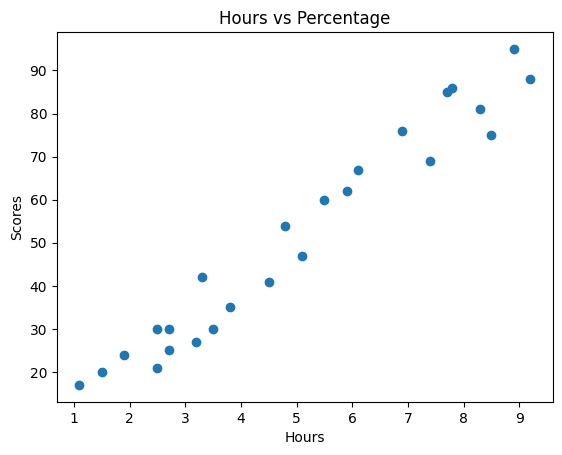

In [ ]:
#visualize the dataset of hours vs percentage of scores
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

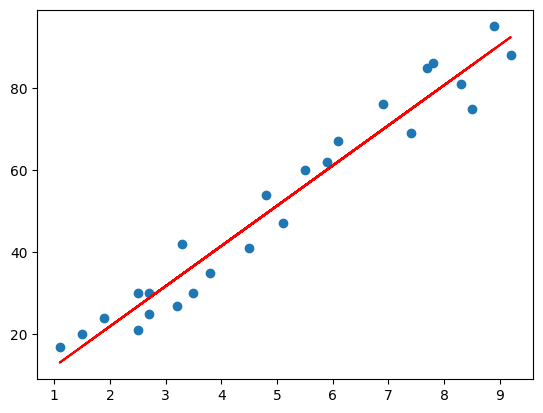

In [ ]:
#Now we will Train-test split the dataset
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

#Training The simple linear regression model on the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
LinearRegression()
#Plot The Regression Line:
line=regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line,color='red');
plt.show()

In [ ]:
#Predict the test results
y_pred=regressor.predict(x_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


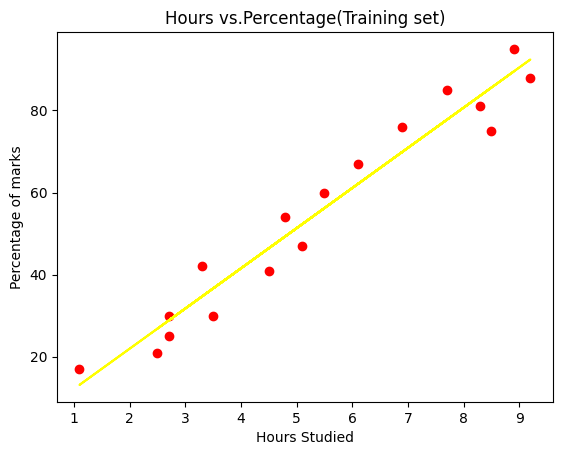

In [ ]:
#Now We Will Visualize Training Set Results:
plt.scatter(x_train,y_train,color="Red")
plt.plot(x_train, regressor.predict(x_train),color="yellow")
plt.title('Hours vs.Percentage(Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage of marks')
plt.show()

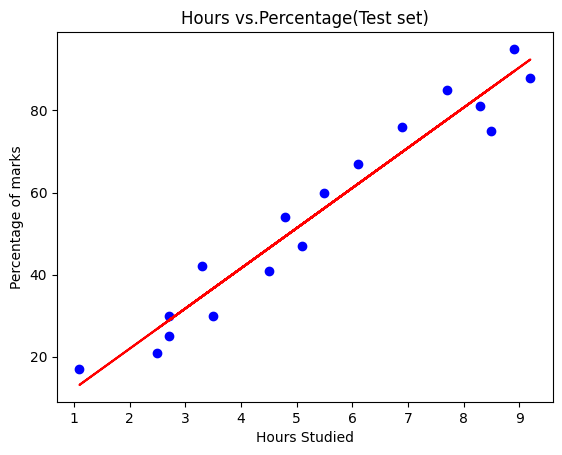

In [ ]:
#Now We Will Visualize Test Set Results:
plt.scatter(x_train,y_train,color="Blue")
plt.plot(x_train, regressor.predict(x_train),color="Red")
plt.title('Hours vs.Percentage(Test set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage of marks')
plt.show()

In [ ]:
#Compare the actual values with predict values;
dataset=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
dataset

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [ ]:
#Now We predicr the score for 9.25hr/day
dataset=np.array(9.25)
dataset=dataset.reshape(-1,1)
pred=regressor.predict(dataset)
print("Student studies for 9.25 hr/day, the score is {}." .format(pred))

Student studies for 9.25 hr/day, the score is [92.91505723].


In [ ]:
#Error Matrices
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027651
